# Imports

In [60]:
import os
import cv2
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
# folder dataset
happy_cat_folder = "waisalkindy_pets_recognition_dataset/happy_cat/"
angry_cat_folder = "waisalkindy_pets_recognition_dataset/angry_cat/"
sad_cat_folder = "waisalkindy_pets_recognition_dataset/sad_cat/"
neutral_cat_folder = "waisalkindy_pets_recognition_dataset/neutral_cat/"

happy_dog_folder = "waisalkindy_pets_recognition_dataset/happy_dog/"
angry_dog_folder = "waisalkindy_pets_recognition_dataset/angry_dog/"
sad_dog_folder = "waisalkindy_pets_recognition_dataset/sad_dog/"
neutral_dog_folder = "waisalkindy_pets_recognition_dataset/neutral_dog/"

limit = 125

In [64]:
# Function to load images and keep track of file names
def load_images_with_filenames(folder, file_extension, limit=None):
    files = glob.glob(folder + file_extension)
    if limit:
        files = files[:limit]
    return [(file, cv2.imread(file)) for file in files]

# Load images and filenames
happy_cat_images = load_images_with_filenames(happy_cat_folder, "*.jpg", limit)
happy_cat_images += load_images_with_filenames(happy_cat_folder, "*.jpeg", limit)

sad_cat_images = load_images_with_filenames(sad_cat_folder, "*.jpg", limit)
sad_cat_images += load_images_with_filenames(sad_cat_folder, "*.jpeg", limit)

angry_cat_images = load_images_with_filenames(angry_cat_folder, "*.jpg", limit)
angry_cat_images += load_images_with_filenames(angry_cat_folder, "*.jpeg", limit)

neutral_cat_images = load_images_with_filenames(neutral_cat_folder, "*.jpg", limit)
neutral_cat_images += load_images_with_filenames(neutral_cat_folder, "*.jpeg", limit)


happy_dog_images = load_images_with_filenames(happy_dog_folder, "*.jpg", limit)
happy_dog_images += load_images_with_filenames(happy_dog_folder, "*.jpeg", limit)

sad_dog_images = load_images_with_filenames(sad_dog_folder, "*.jpg", limit)
sad_dog_images += load_images_with_filenames(sad_dog_folder, "*.jpeg", limit)

angry_dog_images = load_images_with_filenames(angry_dog_folder, "*.jpg", limit)
angry_dog_images += load_images_with_filenames(angry_dog_folder, "*.jpeg", limit)

neutral_dog_images = load_images_with_filenames(neutral_dog_folder, "*.jpg", limit)
neutral_dog_images += load_images_with_filenames(neutral_dog_folder, "*.jpeg", limit)


# Define the images size
common_size = (224, 224)

def resize_images(image_list):
    resized_images = []
    for file_name, image in image_list:
        if image is not None:
            resized_images.append(cv2.resize(image, common_size))
        else:
            print(f"Failed to load image: {file_name}")
    return resized_images

# Resize images and print filenames of None images
images_happy_cat = resize_images(happy_cat_images)
images_sad_cat = resize_images(sad_cat_images)
images_angry_cat = resize_images(angry_cat_images)
images_neutral_cat = resize_images(neutral_cat_images)

images_happy_dog = resize_images(happy_dog_images)
images_sad_dog = resize_images(sad_dog_images)
images_angry_dog = resize_images(angry_dog_images)
images_neutral_dog = resize_images(neutral_dog_images)

libpng warning: iCCP: known incorrect sRGB profile


In [65]:
# # Use glob to get both .jpg and .jpeg files
# happy_files = glob.glob(happy_folder + "*.jpg") + glob.glob(happy_folder + "*.jpeg")
# angry_files = glob.glob(angry_folder + "*.jpg") + glob.glob(angry_folder + "*.jpeg")
# sad_files = glob.glob(sad_folder + "*.jpg") + glob.glob(sad_folder + "*.jpeg")
# neutral_files = glob.glob(neutral_folder + "*.jpg") + glob.glob(neutral_folder + "*.jpeg")

In [66]:
# # Now read the images using cv2.imread
# images_happy = [cv2.imread(file) for file in happy_files][:limit]
# images_angry = [cv2.imread(file) for file in angry_files][:limit]
# images_sad = [cv2.imread(file) for file in sad_files][:limit]
# images_neutral = [cv2.imread(file) for file in neutral_files][:limit]

In [67]:
# images labeling
labels_neutral_cat = [0] * len(images_neutral_cat)
labels_happy_cat = [1] * len(images_happy_cat)
labels_angry_cat = [2] * len(images_angry_cat)
labels_sad_cat = [3] * len(images_sad_cat)

labels_neutral_dog = [0] * len(images_neutral_dog)
labels_happy_dog = [1] * len(images_happy_dog)
labels_angry_dog = [2] * len(images_angry_dog)
labels_sad_dog = [3] * len(images_sad_dog)

In [68]:
# checking data
happy_cat_count = len(images_happy_cat)
angry_cat_count = len(images_angry_cat)
sad_cat_count = len(images_sad_cat)
neutral_cat_count = len(images_neutral_cat)

happy_dog_count = len(images_happy_dog)
angry_dog_count = len(images_angry_dog)
sad_dog_count = len(images_sad_dog)
neutral_dog_count = len(images_neutral_dog)


print(f"happy cat files : {happy_cat_count}")
print(f"angry cat files : {angry_cat_count}")
print(f"sad cat files : {sad_cat_count}")
print(f"neutral cat files : {neutral_cat_count}")

print(f"happy dog files : {happy_dog_count}")
print(f"angry dog files : {angry_dog_count}")
print(f"sad dog files : {sad_dog_count}")
print(f"neutral dog files : {neutral_dog_count}")

happy cat files : 125
angry cat files : 125
sad cat files : 125
neutral cat files : 125
happy dog files : 125
angry dog files : 125
sad dog files : 125
neutral dog files : 125


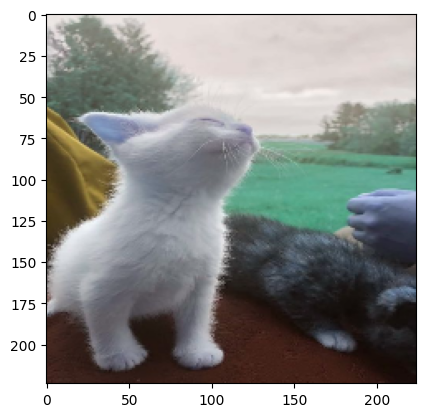

In [69]:
img = np.asarray(images_happy_cat[100])
imgplot = plt.imshow(img)

In [70]:
# # resize images to 112x112

# common_size = (112,112)
# images_happy = [cv2.resize(image, common_size) for image in images_happy]
# images_angry = [cv2.resize(image, common_size) for image in images_angry]
# images_sad = [cv2.resize(image, common_size) for image in images_sad]
# images_neutral = [cv2.resize(image, common_size) for image in images_neutral]

In [71]:
# Concatenate images and labels
X = np.concatenate((images_neutral_cat, images_happy_cat, images_angry_cat, images_sad_cat, 
                    images_neutral_dog, images_happy_dog, images_angry_dog, images_sad_dog), axis = 0)

y = np.concatenate((labels_neutral_cat, labels_happy_cat, labels_angry_cat, labels_sad_cat, 
                    labels_neutral_dog, labels_happy_dog, labels_angry_dog, labels_sad_dog), axis = 0)

In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [73]:
X_train.shape

(800, 224, 224, 3)

In [74]:
y_train.shape

(800,)

# VCG16 Model

In [75]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input as preprocess_input_vgg16

In [76]:
def initialize_vgg16_model():
    # Load the pre-trained VGG16 model without the top (fully connected) layers
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze the layers of the pre-trained VGG16 model
    for layer in base_model.layers:
        layer.trainable = False

    # Create a Sequential model
    model = Sequential()

    # Add the pre-trained VGG16 model as the first layer
    model.add(base_model)


    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(8, activation='softmax'))

    # Model compilation
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [77]:
model_vgg16 = initialize_vgg16_model()

In [78]:
es = EarlyStopping(patience = 5, restore_best_weights= True)

history = model_vgg16.fit(X_train, y_train,
                    epochs = 25,
                    batch_size = 32,
                    validation_split = 0.2,
                    callbacks = [es],
                    verbose = 1)

Epoch 1/25
20/20 [==============================] - 259s 13s/step - loss: 72.8625 - accuracy: 0.3891 - val_loss: 28.4515 - val_accuracy: 0.5188
Epoch 2/25
20/20 [==============================] - 210s 11s/step - loss: 11.2805 - accuracy: 0.7594 - val_loss: 31.1891 - val_accuracy: 0.4938
Epoch 3/25
20/20 [==============================] - 346s 18s/step - loss: 3.1771 - accuracy: 0.8859 - val_loss: 18.3988 - val_accuracy: 0.5562
Epoch 4/25
20/20 [==============================] - 445s 23s/step - loss: 1.4494 - accuracy: 0.9438 - val_loss: 17.6978 - val_accuracy: 0.5562
Epoch 5/25
20/20 [==============================] - 429s 22s/step - loss: 0.3209 - accuracy: 0.9797 - val_loss: 15.3413 - val_accuracy: 0.5750
Epoch 6/25
20/20 [==============================] - 585s 30s/step - loss: 0.3592 - accuracy: 0.9766 - val_loss: 16.6281 - val_accuracy: 0.5750
Epoch 7/25
20/20 [==============================] - 598s 30s/step - loss: 0.2339 - accuracy: 0.9781 - val_loss: 15.4617 - val_accuracy: 0.56

In [79]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # ----Loss----
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend(['Train', 'Validation'], loc= 'best')
    ax[0].grid(axis='x', linewidth=0.5)
    ax[0].grid(axis='y', linewidth=0.5)
    
    # ----Accuracy----
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(['Train', 'Validation'], loc= 'best')
    ax[1].grid(axis='x', linewidth=0.5)
    ax[1].grid(axis='y', linewidth=0.5)
    
    if title:
        fig.suptitle(title)

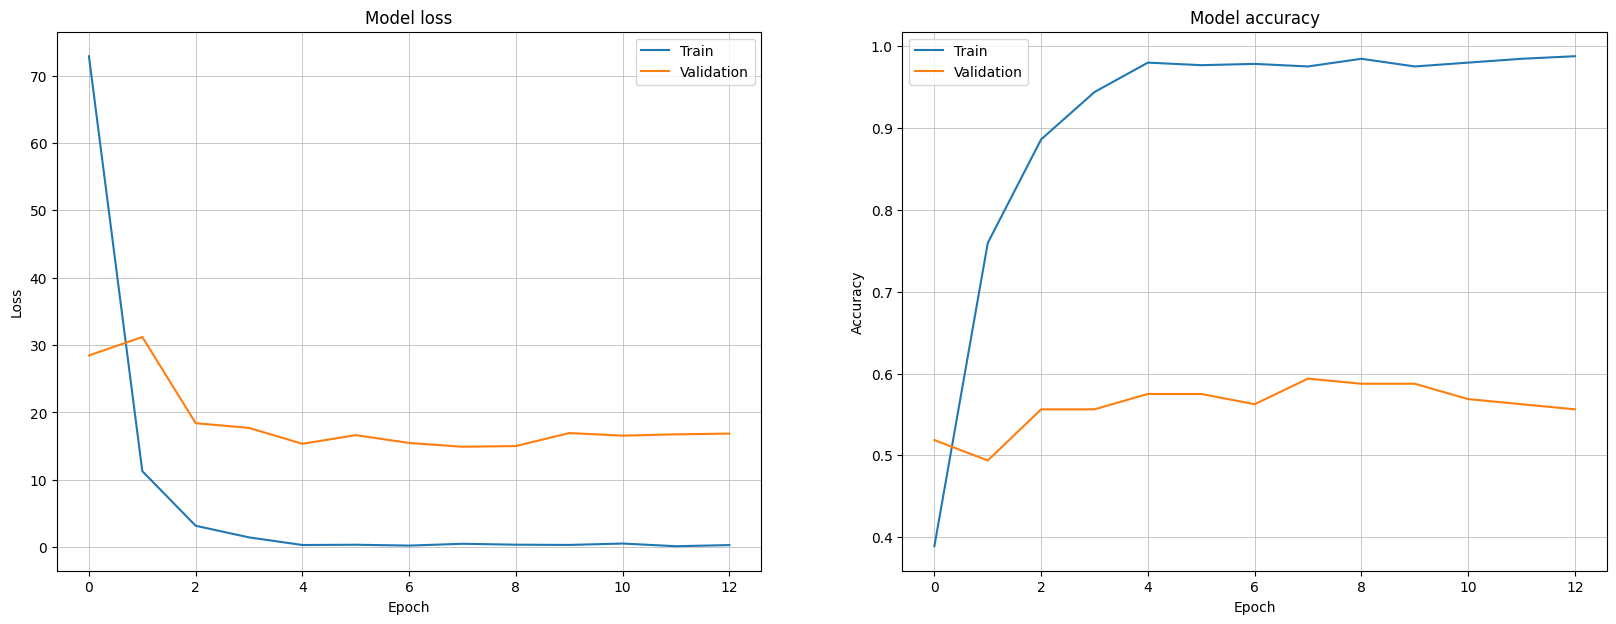

In [80]:
plot_loss_accuracy(history, title=None)

In [81]:
evaluation = model_vgg16.evaluate(X_test, y_test)

7/7 [==============================] - 325s 34s/step - loss: 12.8015 - accuracy: 0.6400


In [82]:
print(f'Model accuracy is {round(evaluation[1]*100,2)} %')

Model accuracy is 64.0 %


# VGG19 Model

In [83]:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input as preprocess_input_vgg19

In [84]:
def initialize_vgg19_model():
    # Load the pre-trained VGG19 model without the top (fully connected) layers
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze the layers of the pre-trained VGG19 model
    for layer in base_model.layers:
        layer.trainable = False

    # Create a Sequential model
    model = Sequential()

    # Add the pre-trained VGG19 model as the first layer
    model.add(base_model)


    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(8, activation='softmax'))

    # Model compilation
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [85]:
model_vgg19 = initialize_vgg19_model()

In [86]:
es = EarlyStopping(patience = 5, restore_best_weights= True)

history = model_vgg19.fit(X_train, y_train,
                    epochs = 25,
                    batch_size = 32,
                    validation_split = 0.2,
                    callbacks = [es],
                    verbose = 1)

Epoch 1/25
20/20 [==============================] - 1036s 53s/step - loss: 82.3028 - accuracy: 0.3641 - val_loss: 31.2085 - val_accuracy: 0.5188
Epoch 2/25
20/20 [==============================] - 625s 31s/step - loss: 9.7676 - accuracy: 0.7500 - val_loss: 21.9654 - val_accuracy: 0.5375
Epoch 3/25
20/20 [==============================] - 526s 27s/step - loss: 3.4098 - accuracy: 0.8828 - val_loss: 14.1804 - val_accuracy: 0.6062
Epoch 4/25
20/20 [==============================] - 548s 28s/step - loss: 0.7683 - accuracy: 0.9438 - val_loss: 11.5848 - val_accuracy: 0.6062
Epoch 5/25
20/20 [==============================] - 546s 28s/step - loss: 0.4046 - accuracy: 0.9719 - val_loss: 11.3584 - val_accuracy: 0.6062
Epoch 6/25
20/20 [==============================] - 643s 33s/step - loss: 0.3602 - accuracy: 0.9766 - val_loss: 10.0151 - val_accuracy: 0.6187
Epoch 7/25
20/20 [==============================] - 587s 30s/step - loss: 0.3221 - accuracy: 0.9766 - val_loss: 10.0644 - val_accuracy: 0.61

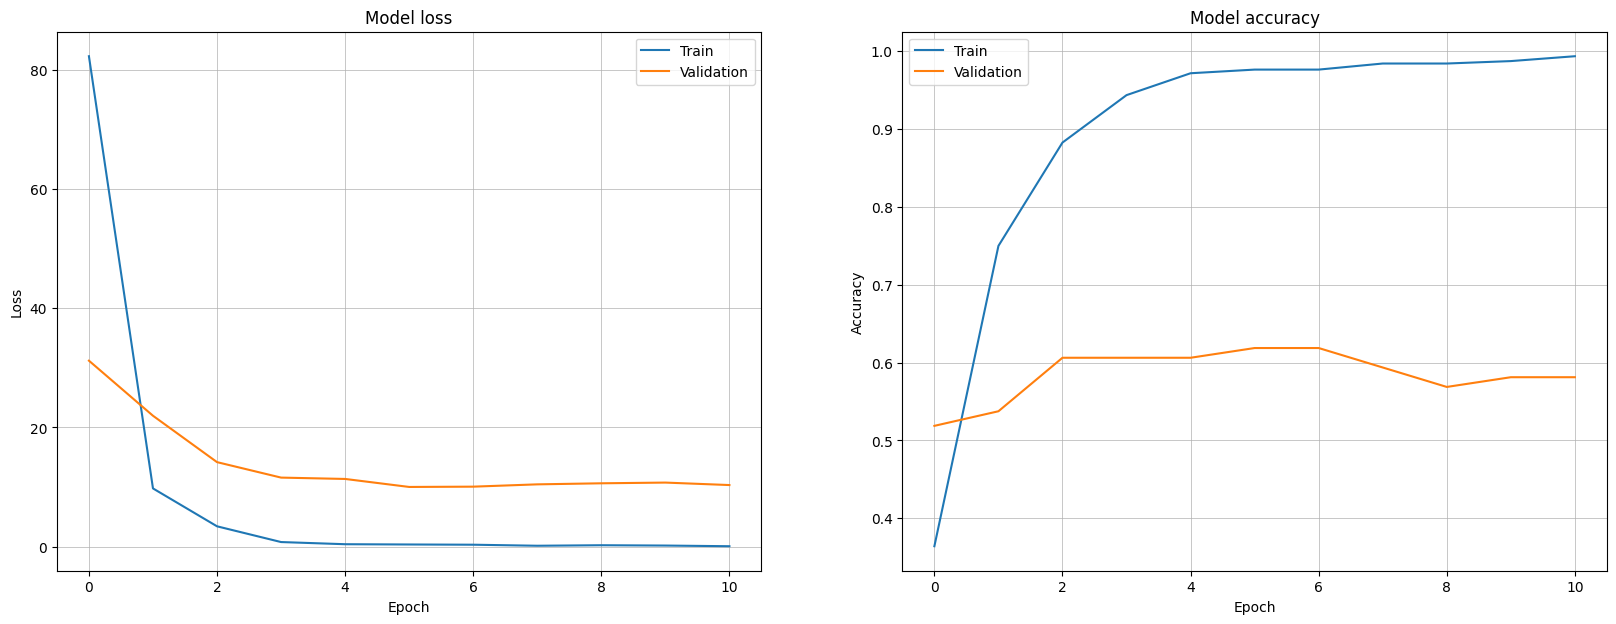

In [87]:
plot_loss_accuracy(history, title=None)

In [88]:
evaluation = model_vgg19.evaluate(X_test, y_test)

7/7 [==============================] - 43s 6s/step - loss: 11.7004 - accuracy: 0.5600


In [89]:
print(f'Model accuracy is {round(evaluation[1]*100,2)} %')

Model accuracy is 56.0 %


# EfficientNetB3

In [104]:
from tensorflow.keras.applications.efficientnet import preprocess_input
from keras.applications import EfficientNetB7

In [105]:
def initialize_effnetB7_model():
    # Load the pre-trained EfficientNetB7 model without the top (fully connected) layers
    base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze the layers of the pre-trained EfficientNetB7 model
    for layer in base_model.layers:
        layer.trainable = False

    # Create a Sequential model
    model = Sequential()


    # Add the pre-trained EfficientNetB7 model as the first layer
    model.add(base_model)


    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='softmax'))

    # Model compilation
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [106]:
model_effnet = initialize_effnetB7_model()

In [107]:
es = EarlyStopping(patience = 5, restore_best_weights= True)

history = model_effnet.fit(X_train, y_train,
                    epochs = 25,
                    batch_size = 32,
                    validation_split = 0.2,
                    callbacks = [es],
                    verbose = 1)

Epoch 1/25
20/20 [==============================] - 177s 7s/step - loss: 25.6975 - accuracy: 0.3625 - val_loss: 12.1622 - val_accuracy: 0.5188
Epoch 2/25
20/20 [==============================] - 122s 6s/step - loss: 6.1098 - accuracy: 0.6687 - val_loss: 9.8399 - val_accuracy: 0.5375
Epoch 3/25
20/20 [==============================] - 169s 9s/step - loss: 2.2140 - accuracy: 0.8406 - val_loss: 8.9576 - val_accuracy: 0.5125
Epoch 4/25
20/20 [==============================] - 142s 7s/step - loss: 1.0689 - accuracy: 0.9016 - val_loss: 8.1581 - val_accuracy: 0.5562
Epoch 5/25
20/20 [==============================] - 124s 6s/step - loss: 0.9326 - accuracy: 0.9062 - val_loss: 8.0649 - val_accuracy: 0.5750
Epoch 6/25
20/20 [==============================] - 122s 6s/step - loss: 0.7087 - accuracy: 0.9156 - val_loss: 7.3574 - val_accuracy: 0.5437
Epoch 7/25
20/20 [==============================] - 125s 6s/step - loss: 0.2899 - accuracy: 0.9531 - val_loss: 6.4434 - val_accuracy: 0.6187
Epoch 8/25


In [ ]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # ----Loss----
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend(['Train', 'Validation'], loc= 'best')
    ax[0].grid(axis='x', linewidth=0.5)
    ax[0].grid(axis='y', linewidth=0.5)
    
    # ----Accuracy----
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(['Train', 'Validation'], loc= 'best')
    ax[1].grid(axis='x', linewidth=0.5)
    ax[1].grid(axis='y', linewidth=0.5)
    
    if title:
        fig.suptitle(title)

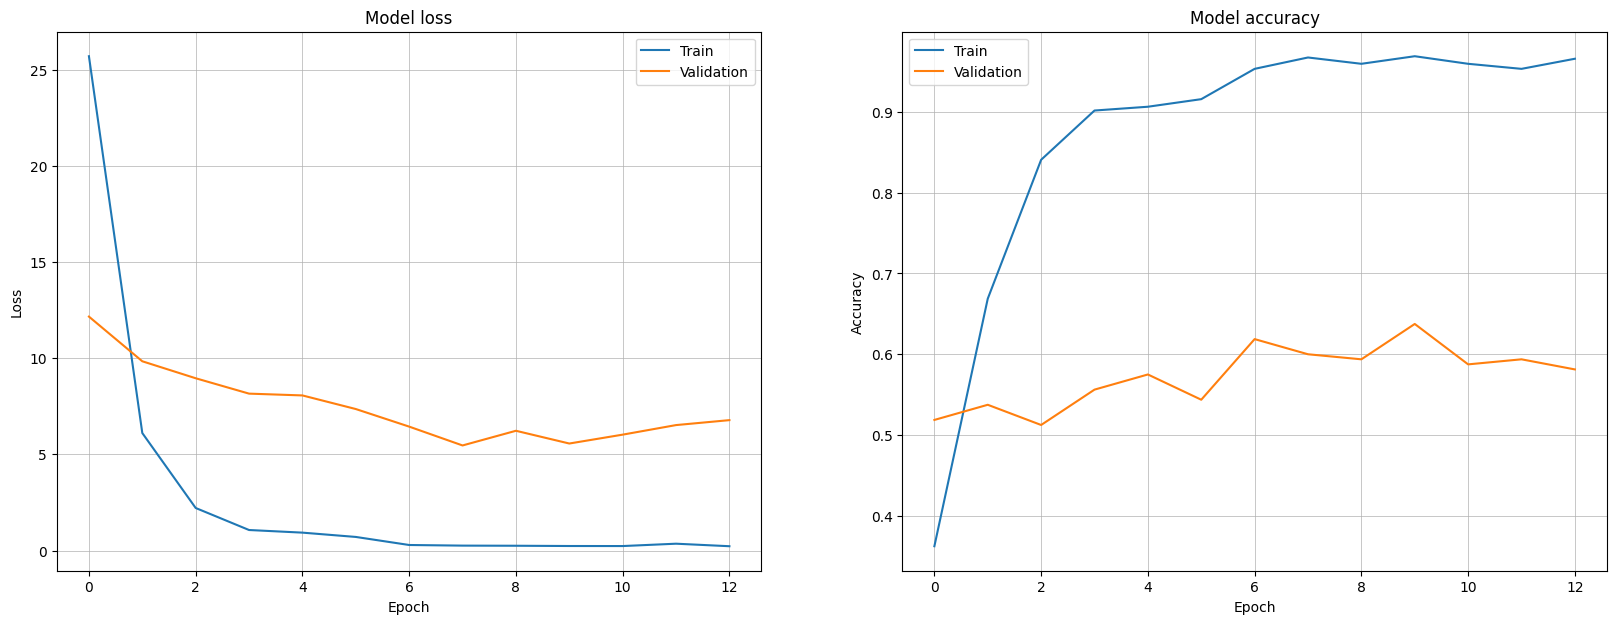

In [108]:
plot_loss_accuracy(history, title=None)

In [109]:
evaluation = model_effnet.evaluate(X_test, y_test)

7/7 [==============================] - 155s 18s/step - loss: 5.0473 - accuracy: 0.6700


In [110]:
print(f'Model accuracy is {round(evaluation[1]*100,2)} %')

Model accuracy is 67.0 %


In [130]:
model_effnet.save('EfficientNetB3_model_67.h5')

/Users/mirmachr/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [129]:
model_effnet.save('EfficientNetB3_model_67.tf')

INFO:tensorflow:Assets written to: EfficientNetB3_model_67.tf/assets


INFO:tensorflow:Assets written to: EfficientNetB3_model_67.tf/assets


# Inception

In [97]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

In [98]:
def initialize_inception_model():
    model = Sequential()

    model.add(base_model)

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='softmax'))

    model.compile(optimizer = 'adam', 
                  loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

    return model

In [99]:
model_inception = initialize_inception_model()

In [100]:
es = EarlyStopping(patience = 5, restore_best_weights= True)

history = model_inception.fit(X_train, y_train,
                    epochs = 25,
                    batch_size = 32,
                    validation_split = 0.2,
                    callbacks = [es],
                    verbose = 1)

Epoch 1/25
20/20 [==============================] - 34s 2s/step - loss: 759.4818 - accuracy: 0.2781 - val_loss: 636.0333 - val_accuracy: 0.2313
Epoch 2/25
20/20 [==============================] - 28s 1s/step - loss: 405.3357 - accuracy: 0.4094 - val_loss: 371.4069 - val_accuracy: 0.3000
Epoch 3/25
20/20 [==============================] - 28s 1s/step - loss: 205.0002 - accuracy: 0.4437 - val_loss: 410.7934 - val_accuracy: 0.2500
Epoch 4/25
20/20 [==============================] - 28s 1s/step - loss: 120.2164 - accuracy: 0.5375 - val_loss: 164.9309 - val_accuracy: 0.3187
Epoch 5/25
20/20 [==============================] - 27s 1s/step - loss: 45.2304 - accuracy: 0.6203 - val_loss: 90.0981 - val_accuracy: 0.3313
Epoch 6/25
20/20 [==============================] - 29s 1s/step - loss: 17.7901 - accuracy: 0.6938 - val_loss: 43.9928 - val_accuracy: 0.3500
Epoch 7/25
20/20 [==============================] - 38s 2s/step - loss: 7.7954 - accuracy: 0.7000 - val_loss: 18.0199 - val_accuracy: 0.3562

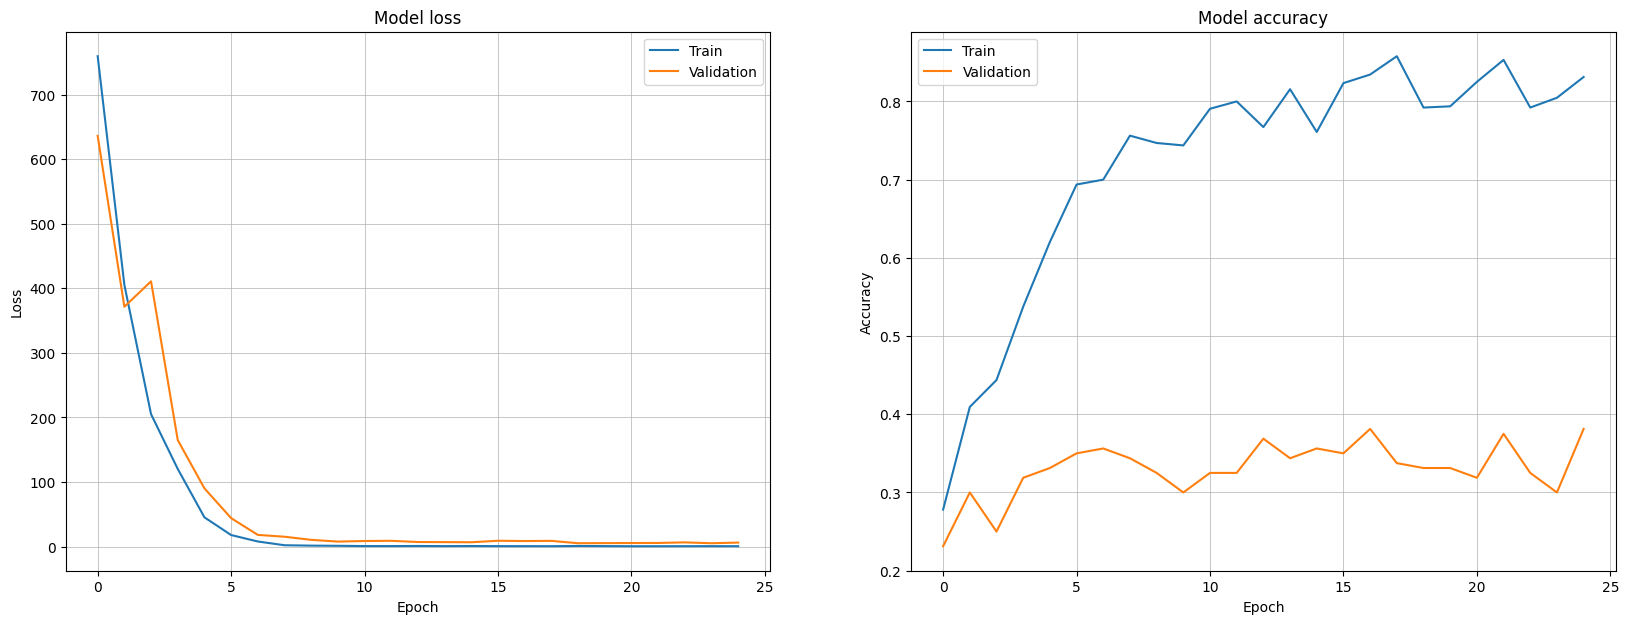

In [101]:
plot_loss_accuracy(history, title=None)

In [102]:
evaluation = model_inception.evaluate(X_test, y_test)

7/7 [==============================] - 8s 901ms/step - loss: 7.1476 - accuracy: 0.3400


In [103]:
print(f'Model accuracy is {round(evaluation[1]*100,2)} %')

Model accuracy is 34.0 %


In [114]:
# # Save model
# model_effnet.save("pets_expression_effnet_new.h5")

## Prediction

In [122]:
from tensorflow.keras.models import load_model

best_model = load_model('EfficientNetB3_model_67.h5')

In [123]:
prediction = best_model.predict(X_test)

7/7 [==============================] - 108s 12s/step


In [124]:
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

In [125]:
# Replace 'path_to_your_image' with the path to your animal image
img_array = load_and_preprocess_image('waisalkindy_pets_recognition_dataset/angry_cat/126.jpg')

In [126]:
# Make a prediction
prediction = best_model.predict(img_array)

1/1 [==============================] - 18s 18s/step


In [127]:
# Decode the prediction
emotion = np.argmax(prediction)
emotions = ['Neutral', 'Happy', 'Angry', 'Sad','Neutral', 'Happy', 'Angry', 'Sad']
predicted_emotion = emotions[emotion]

print("Predicted Emotion:", predicted_emotion)

Predicted Emotion: Angry
